# Using slightly altered colors to make a distinction between related data

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

First, we make up some data. The data we create has `y` for actual data value and `yfit` for a hypothetical fitted model. It also
has a category column `cat`.

In [2]:
n = 10
df = pd.DataFrame({'x': np.arange(n),
                   'y': np.arange(n),
                   'yfit': np.arange(n) + np.tile([-.2, .2], n//2),
                   'cat': ['a', 'b']*(n//2)})

Initial plot

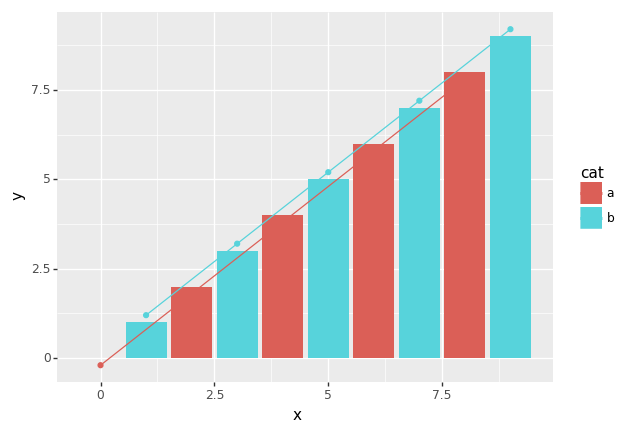

<ggplot: (97654321012345679)>

In [3]:
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
)

There is a clash of colors between the actual data (the bars) and the fitted model (the points and lines).
A simple solution is to adjust the colors of the fitted data slightly. We do that by varying the *lightness*
of the default color scale, make them a little darker.

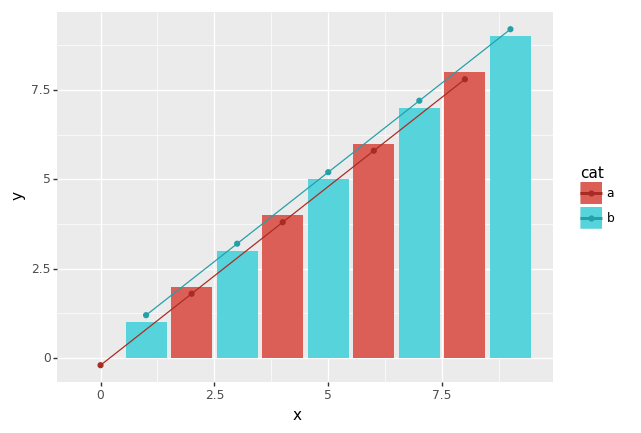

<ggplot: (97654321012345679)>

In [4]:
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
 + scale_color_discrete(l=.4)                                     # new
)

There are two main pieces of information in the plot, but we a single combined legend. Since we use separate aesthetics
for the actual data and fitted model, we can have distinct legends for both. 

We manually define the legend for the `fill` and `color` aesthetics, this overrides the automatic legend creation.

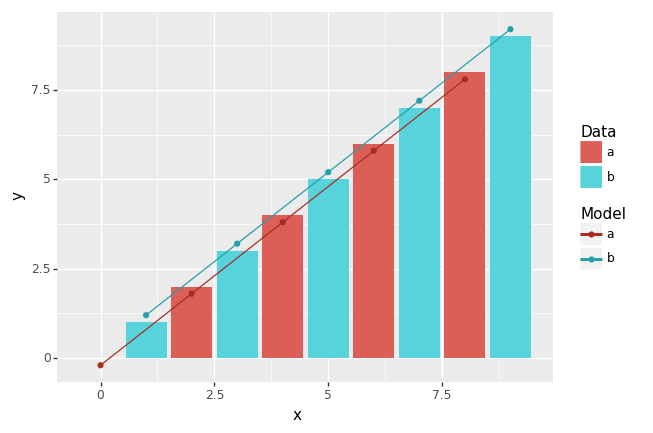

<ggplot: (97654321012345679)>

In [5]:
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
 + scale_color_discrete(l=.4)
 + guides(                                                        # new
     fill=guide_legend(title='Data'),
     color=guide_legend(title='Model'))
)